In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import seaborn as sns

from module.cleaner import Cleaner

In [2]:
%load_ext autoreload
%autoreload 2

Initialisation du dataframe et nettoyage

In [3]:
files_to_load = glob.glob('../data/*.txt')

cleaner = Cleaner()
dvf_raw = cleaner.initialize(files_to_load)

cleaner.clean()

/workspaces/analyse/src/module/cleaner.py:10: DtypeWarning: Columns (18,23,24,26,28,30,41) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.concat([pd.read_csv(file, sep='|', decimal=',') for file in files])
/workspaces/analyse/src/module/cleaner.py:10: DtypeWarning: Columns (18,23,24,26,28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.concat([pd.read_csv(file, sep='|', decimal=',') for file in files])


Mise à jour des colonnes

In [4]:
def updateCodeDep(code: object):
    return str.zfill(str(code), 2)
    
dvf_raw['Code departement'] = dvf_raw['Code departement'].apply(updateCodeDep)

Création de colonne

In [5]:

REGIONS = {
    'Auvergne-Rhône-Alpes': ['01', '03', '07', '15', '26', '38', '42', '43', '63', '69', '73', '74'],
    'Bourgogne-Franche-Comté': ['21', '25', '39', '58', '70', '71', '89', '90'],
    'Bretagne': ['35', '22', '56', '29'],
    'Centre-Val de Loire': ['18', '28', '36', '37', '41', '45'],
    'Corse': ['2A', '2B'],
    'Grand Est': ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88'],
    'Guadeloupe': ['971'],
    'Guyane': ['973'],
    'Hauts-de-France': ['02', '59', '60', '62', '80'],
    'Île-de-France': ['75', '77', '78', '91', '92', '93', '94', '95'],
    'La Réunion': ['974'],
    'Martinique': ['972'],
    'Normandie': ['14', '27', '50', '61', '76'],
    'Nouvelle-Aquitaine': ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
    'Occitanie': ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
    'Pays de la Loire': ['44', '49', '53', '72', '85'],
    'Provence-Alpes-Côte d\'Azur': ['04', '05', '06', '13', '83', '84'],
}


def get_region(code):
    for region, codes in REGIONS.items():
        if code in codes:
            return region
    return None

dvf_raw['Region'] = dvf_raw['Code departement'].apply(get_region)

Filtre des données


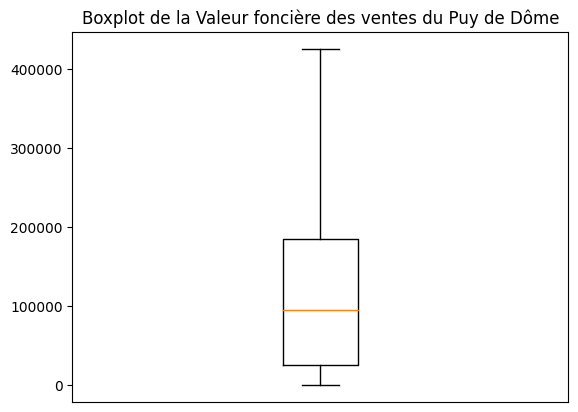

In [9]:
dvf_filtered = dvf_raw.loc[(dvf_raw['Nature mutation'] == "Vente") & (dvf_raw['Code departement'] == "63")]


plt.boxplot([dvf_filtered['Valeur fonciere'].dropna()], showfliers=False)

plt.title('Boxplot de la Valeur foncière des ventes du Puy de Dôme')

plt.xticks([])

plt.show()  

Graphique qui mettent en valeur une analyse de données

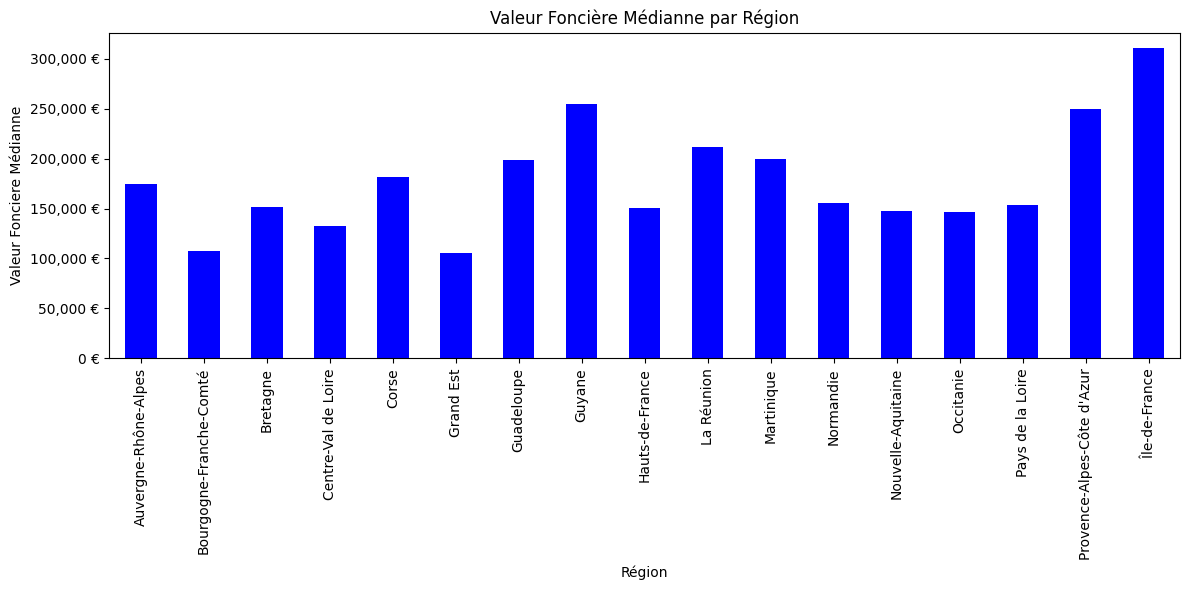

In [7]:
valeur_fonciere_median_region = dvf_raw.groupby('Region')['Valeur fonciere'].median()
plt.figure(figsize=(12, 6))
valeur_fonciere_median_region.plot(kind='bar', color='blue')
plt.title('Valeur Foncière Médianne par Région')
plt.xlabel('Région')
plt.ylabel('Valeur Fonciere Médianne')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f} €"))
plt.tight_layout()

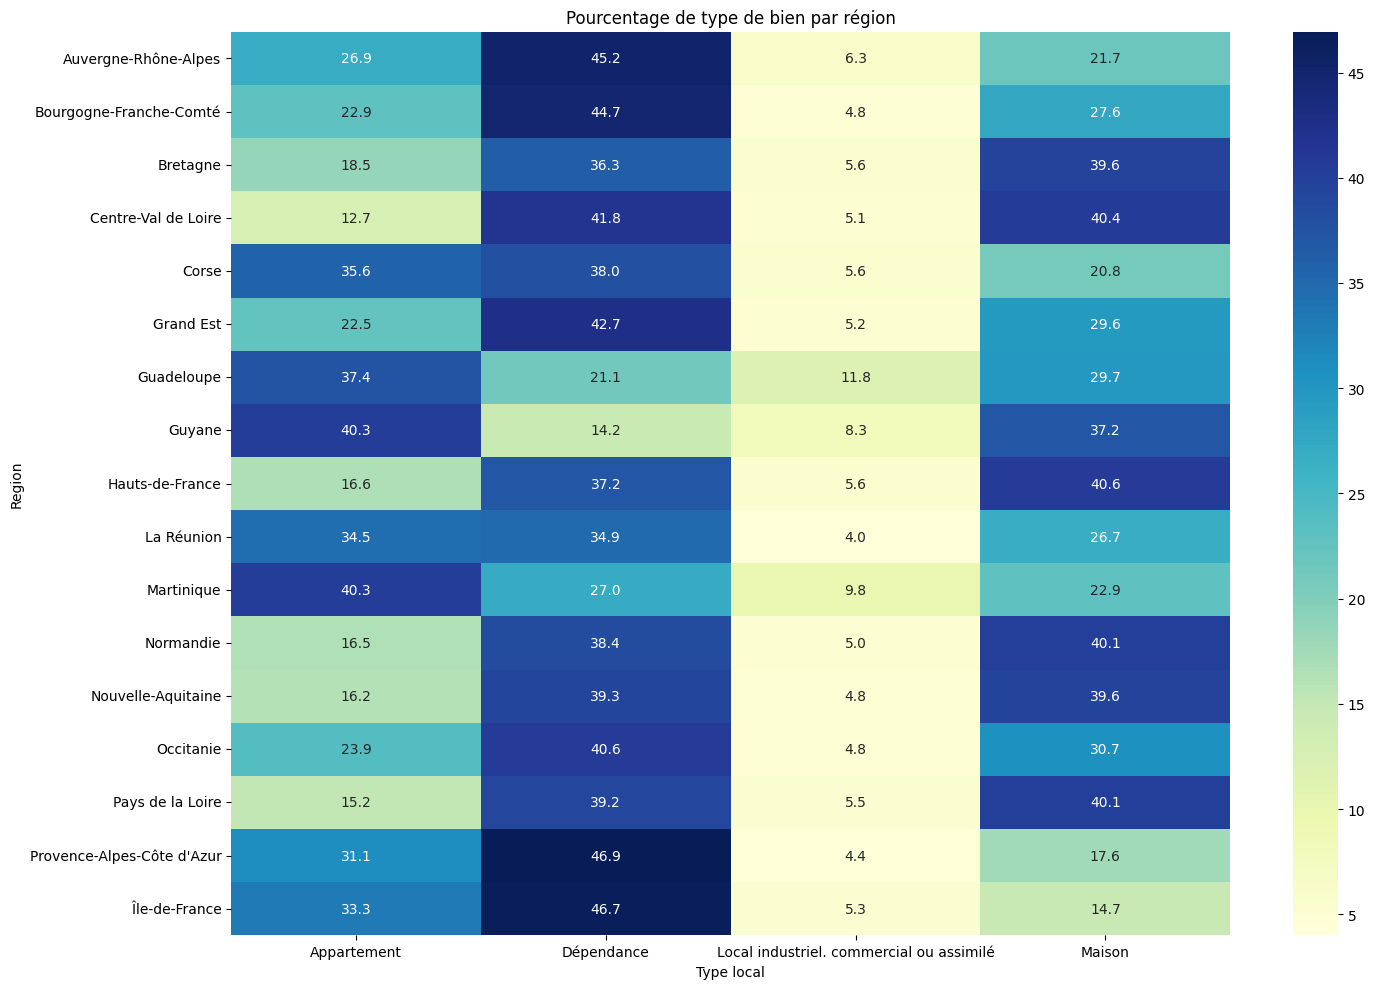

In [8]:
type_departement = dvf_raw[['Region', 'Type local']]
pivot_table = type_departement.groupby(['Region', 'Type local']).size().unstack(fill_value=0)
total_counts = pivot_table.sum(axis=1)
pivot_table_percentage = pivot_table.divide(total_counts, axis=0) * 100

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_percentage, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Pourcentage de type de bien par région')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()